<a href="https://colab.research.google.com/github/HinePo/PNAD-analysis-and-prediction/blob/master/PNAD_2015.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PNAD

In this article we will study the PNAD database from 2015, clean and explore the data, and then we will use AI to try to predict the value of the column 'Renda' (monthly salary) based on the other variables.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Loading the dataset

PNAD: Pesquisa Nacional por Amostra de Domicílios 2015 - IBGE (Instituto Brasileiro de Geografia e Estatística)


Dataset available in https://www.kaggle.com/upadorprofzs/testes

In [2]:
df = pd.read_csv('/content/dados.csv')
df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [3]:
df.shape
# there are 76840 rows and 7 columns on the dataframe (df)

(76840, 7)

In [4]:
df.isnull().values.any()

False

In [5]:
df['Cor'].unique()

array([8, 2, 4, 6, 0])

In [6]:
df.dtypes

UF                  int64
Sexo                int64
Idade               int64
Cor                 int64
Anos de Estudo      int64
Renda               int64
Altura            float64
dtype: object

#Data Manipulation

As mentioned in the dataset description (link above), although the dataframe has only integer and float values, a lot of the columns are categorical variables codes.

All models require that only numerical data is fed to it. We can use the dataset as it is, but it's not ideal since this way we are applying different values and importances that don't really exist in the categories of the features.

So I usually prefer another approach. For this, first I will have to map the categorical values to their respective categories, and then we can perform One Hot Encoding technique to get the dummies from each categorical feature. This way we won't attribute any importance to any category, and will also help us to analyse the data. The down side is the dataset will become much larger with the dummies.

In [7]:
# How many categories are present in each column?

for col in df.columns:
  print(col, " :", len(df[col].unique()))

UF  : 27
Sexo  : 2
Idade  : 84
Cor  : 5
Anos de Estudo  : 17
Renda  : 1606
Altura  : 76831


##UF column

In [8]:
Dict_UF = {
    11 : 'Rondônia',
    12 : 'Acre',
    13 : 'Amazonas',
    14 : 'Roraima',
    15 : 'Pará',
    16 : 'Amapá',
    17 : 'Tocantins',
    21 : 'Maranhão',
    22 : 'Piauí',
    23 : 'Ceará',
    24 : 'Rio Grande do Norte',
    25 : 'Paraíba',
    26 : 'Pernambuco',
    27 : 'Alagoas',
    28 : 'Sergipe',
    29 : 'Bahia',
    31 : 'Minas Gerais',
    32 : 'Espírito Santo',
    33 : 'Rio de Janeiro',
    35 : 'São Paulo',
    41 : 'Paraná',
    42 : 'Santa Catarina',
    43 : 'Rio Grande do Sul',
    50 : 'Mato Grosso do Sul',
    51 : 'Mato Grosso',
    52 : 'Goiás',
    53 : 'Distrito Federal'
}

In [9]:
df["UF"] = df["UF"].map(Dict_UF)

In [10]:
# Verifying changes made
df.loc[2000:2010]

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
2000,Acre,0,44,8,13,4000,1.665312
2001,Acre,0,30,2,16,3000,1.690788
2002,Acre,0,59,8,1,900,1.903044
2003,Acre,0,48,8,12,2500,1.780344
2004,Acre,0,59,4,16,2500,1.691845
2005,Acre,1,43,8,16,2400,1.645096
2006,Acre,1,39,2,9,395,1.695039
2007,Acre,0,82,2,1,3000,1.756083
2008,Acre,1,25,8,15,788,1.692698
2009,Acre,1,39,8,16,1200,1.644775


##Sexo column

This column is ok and will not be modified.

0 means 'male'.

1 means 'female'.

##Idade column

This column is also alright and doesn't need any changes.

##Cor column

In [11]:
Dict_Cor = {
    0 : 'Indígena',
    2 : 'Branca',
    4 : 'Preta',
    6 : 'Amarela',
    8 : 'Parda',
    9 : 'Sem declaração'
    }

In [12]:
df["Cor"] = df["Cor"].map(Dict_Cor)

In [13]:
# Verifying changes made
df.loc[45000:45005]

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
45000,Rio de Janeiro,0,36,Branca,12,3200,1.554542
45001,Rio de Janeiro,0,38,Preta,12,1650,1.673025
45002,Rio de Janeiro,0,24,Parda,9,1500,1.618131
45003,Rio de Janeiro,0,45,Branca,16,2500,1.531065
45004,Rio de Janeiro,0,66,Branca,9,1300,1.720447
45005,Rio de Janeiro,0,25,Branca,11,1500,1.578968


In [14]:
df.groupby('Cor').count()

,UF,Sexo,Idade,Anos de Estudo,Renda,Altura
Cor,,,,,,
Amarela,352,352,352,352,352,352
Branca,31815,31815,31815,31815,31815,31815
Indígena,357,357,357,357,357,357
Parda,35925,35925,35925,35925,35925,35925
Preta,8391,8391,8391,8391,8391,8391


##Anos de Estudo column

In [15]:
df['Anos de Estudo'].value_counts()

12    20848
16    10795
9      7980
5      6729
1      5849
6      4499
4      2891
8      2689
7      2445
11     2118
3      2101
10     1840
13     1836
15     1388
2      1388
14     1253
17      191
Name: Anos de Estudo, dtype: int64

In [16]:
Dict_Anos = {
    1 : 0,
    2 : 1,
    3 : 2,
    4 : 3,
    5 : 4,
    6 : 5,
    7 : 6,
    8 : 7,
    9 : 8,
    10 : 9,
    11 : 10,
    12 : 11,
    13 : 12,
    14 : 13,
    15 : 14,
    16 : 15,
    17 : 0
    }

In [17]:
df["Anos de Estudo"] = df["Anos de Estudo"].map(Dict_Anos)

In [18]:
df.dtypes

UF                 object
Sexo                int64
Idade               int64
Cor                object
Anos de Estudo      int64
Renda               int64
Altura            float64
dtype: object

In [19]:
# Verifying changes made
df.tail()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
76835,Distrito Federal,1,46,Branca,10,812,1.687030
76836,Distrito Federal,0,30,Preta,6,1500,1.792934
76837,Distrito Federal,0,32,Parda,11,1300,1.830587
76838,Distrito Federal,0,57,Parda,3,1500,1.726344
76839,Distrito Federal,0,38,Parda,3,900,1.658305


##Renda column

This is also fine.

##Altura column

In [20]:
df['Altura'] = round(df['Altura'], 2)

In [21]:
df.loc[900:905]

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
900,Rondônia,1,49,Parda,8,900,1.68
901,Rondônia,1,40,Indígena,3,900,1.66
902,Rondônia,1,44,Parda,4,700,1.72
903,Rondônia,0,54,Parda,8,780,1.79
904,Rondônia,1,53,Parda,8,788,1.76
905,Rondônia,1,42,Parda,4,850,1.79


#Exploratory Data Analysis

Let's do some brief analysis of the dataset.

In [22]:
df.columns

Index(['UF', 'Sexo', 'Idade', 'Cor', 'Anos de Estudo', 'Renda', 'Altura'], dtype='object')

##UF

In [23]:
df["UF"].value_counts()

São Paulo              8544
Minas Gerais           7686
Rio Grande do Sul      6322
Bahia                  5717
Rio de Janeiro         5556
Pará                   4449
Paraná                 4356
Pernambuco             3820
Goiás                  3478
Ceará                  3359
Santa Catarina         2275
Amazonas               2206
Distrito Federal       2054
Mato Grosso            1800
Maranhão               1787
Rondônia               1537
Espírito Santo         1511
Mato Grosso do Sul     1440
Tocantins              1306
Sergipe                1287
Paraíba                1274
Piauí                  1211
Rio Grande do Norte     973
Acre                    937
Alagoas                 903
Roraima                 540
Amapá                   512
Name: UF, dtype: int64

Text(0.5, 1.0, 'Number of observations by UF')

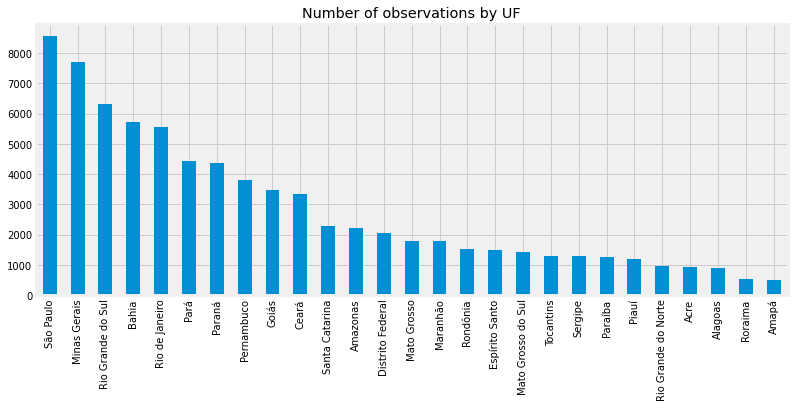

In [24]:
df["UF"].value_counts().plot(kind = 'bar', figsize=(12,5))
plt.title("Number of observations by UF")

##Sexo

In [25]:
df["Sexo"].value_counts()

0    53250
1    23590
Name: Sexo, dtype: int64

Text(0.5, 1.0, 'Number of observations by Sexo')

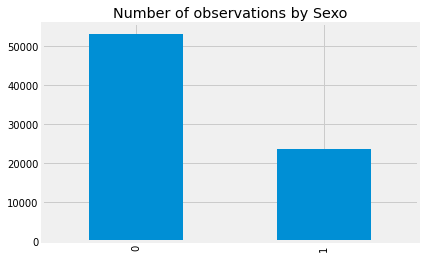

In [26]:
df["Sexo"].value_counts().plot(kind = 'bar')
plt.title("Number of observations by Sexo")
# 0 means male;
# 1 means female.

##Idade

In [27]:
df["Idade"].value_counts()

40    2263
45    2250
37    2235
43    2213
35    2206
      ... 
14       1
99       1
97       1
95       1
94       1
Name: Idade, Length: 84, dtype: int64

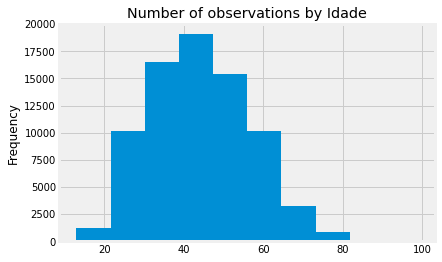

In [28]:
plt.title("Number of observations by Idade")
df["Idade"].plot(kind = 'hist')

In [29]:
# from 76840 observations, there are 423 that have Age less than 20
# we will probably drop these rows later, since they don't contribute to any Renda/Salary analysis
len(df["Idade"][df["Idade"]<20])

423

In [30]:
print("Maximum value for Idade", df["Idade"].max())
print("Minimum value for Idade", df["Idade"].min())

Maximum value for Idade 99
Minimum value for Idade 13


##Cor

In [31]:
df["Cor"].value_counts()

Parda       35925
Branca      31815
Preta        8391
Indígena      357
Amarela       352
Name: Cor, dtype: int64

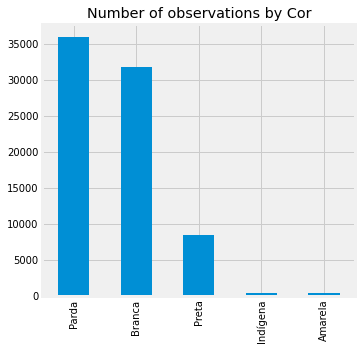

In [32]:
plt.figure(figsize = (5,5))
plt.title("Number of observations by Cor")
df["Cor"].value_counts().plot(kind = 'bar')

##Anos de Estudo

15 years means '15 years or more'.

In [33]:
df["Anos de Estudo"].value_counts()

11    20848
15    10795
8      7980
4      6729
0      6040
5      4499
3      2891
7      2689
6      2445
10     2118
2      2101
9      1840
12     1836
14     1388
1      1388
13     1253
Name: Anos de Estudo, dtype: int64

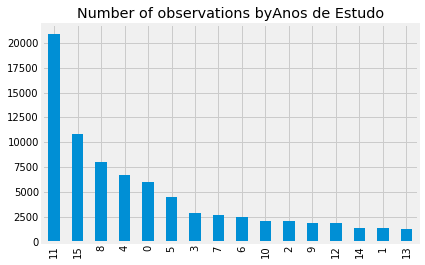

In [34]:
plt.title("Number of observations byAnos de Estudo")
df["Anos de Estudo"].value_counts().plot(kind = 'bar')

Text(0.5, 1.0, 'Anos de Estudo x Cor')

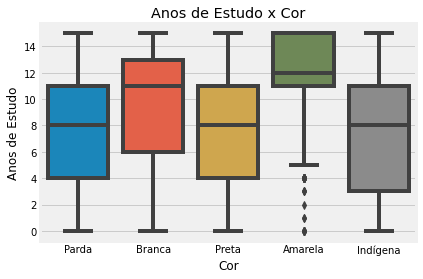

In [35]:
# Anos de estudo by Cor
sns.boxplot(x = df['Cor'], y = df['Anos de Estudo'], data = df)
plt.title("Anos de Estudo x Cor")

Text(0.5, 1.0, 'Anos de Estudo x Sexo')

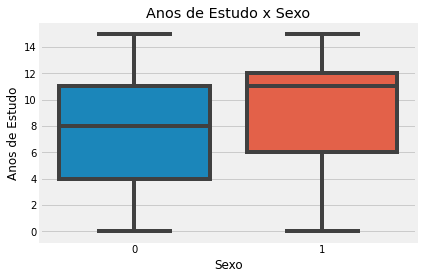

In [36]:
# Anos de estudo by Sexo
sns.boxplot(x = df['Sexo'], y = df['Anos de Estudo'], data = df)
plt.title("Anos de Estudo x Sexo")

Text(0.5, 1.0, 'Anos de Estudo (Average) x UF')

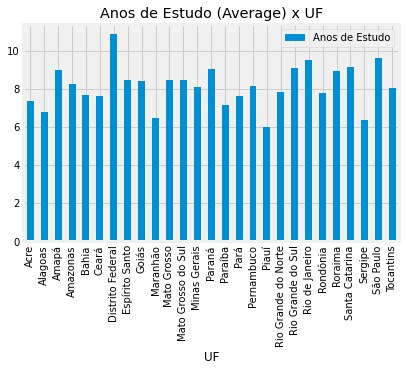

In [37]:
df.groupby('UF').mean()[['Anos de Estudo']].plot(kind='bar')
plt.title("Anos de Estudo (Average) x UF")

##Renda

###Renda Distribution

In [38]:
df["Renda"].value_counts()

788      6881
1500     4567
1200     4476
2000     4233
1000     4158
         ... 
15781       1
1442        1
1378        1
21800       1
7388        1
Name: Renda, Length: 1606, dtype: int64

In [39]:
# Some insights
print("Number of observations that have Renda < 20 k :", len(df["Renda"][df["Renda"] < 20000]))
print("Number of observations that have Renda > 20 k :", len(df["Renda"][df["Renda"] > 20000]))
print("Number of observations that have Renda > 40 k :", len(df["Renda"][df["Renda"] > 40000]))
print("\nAverage Salary (Renda) :", round(df['Renda'].mean(), 2))
print("Maximum value for Renda :", df["Renda"].max())
print("Minimum value for Renda :", df["Renda"].min())

Number of observations that have Renda < 20 k : 76420
Number of observations that have Renda > 20 k : 259
Number of observations that have Renda > 40 k : 41

Average Salary (Renda) : 2000.38
Maximum value for Renda : 200000
Minimum value for Renda : 0


Text(0.5, 1.0, 'Frequency x Renda (<5k)')

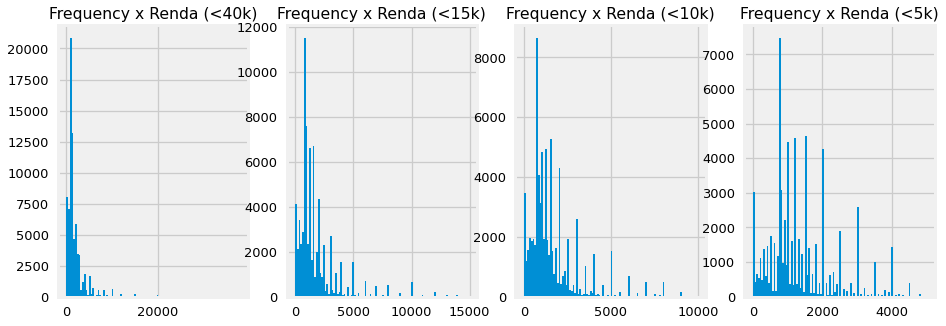

In [40]:
# hist plot with zoom
plt.style.use('seaborn-talk')
fig, ax = plt.subplots(1, 4, figsize = (14, 5))
ax[0].hist(df["Renda"][df["Renda"] < 40000], bins = 100)
ax[0].set_title('Frequency x Renda (<40k)')
ax[1].hist(df["Renda"][df["Renda"] < 15000], bins = 100)
ax[1].set_title('Frequency x Renda (<15k)')
ax[2].hist(df["Renda"][df["Renda"] < 10000], bins = 100)
ax[2].set_title('Frequency x Renda (<10k)')
ax[3].hist(df["Renda"][df["Renda"] < 5000], bins = 100)
ax[3].set_title('Frequency x Renda (<5k)')

Text(0.5, 1.0, 'Frequency x Renda (>40k)')

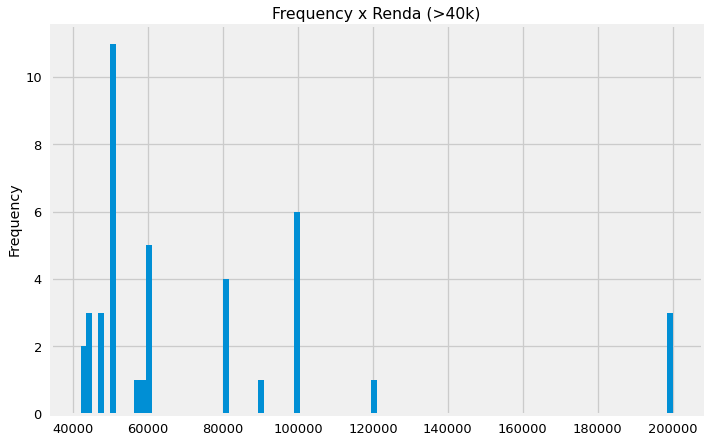

In [41]:
df["Renda"][df["Renda"] > 40000].plot(kind = 'hist', bins = 100)
plt.title('Frequency x Renda (>40k)')

###Renda x Cor

Text(0.5, 1.0, 'Renda (<5k) x Cor')

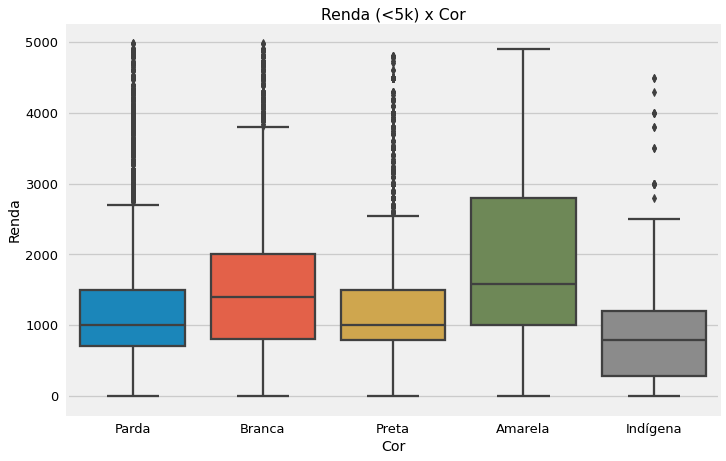

In [42]:
# Renda (<5000) by cor
sns.boxplot(x = df['Cor'], y = df['Renda'][df['Renda'] < 5000], data = df[df['Renda'] < 5000])
plt.title('Renda (<5k) x Cor')

Text(0.5, 1.0, 'Renda (>25k)  x Cor')

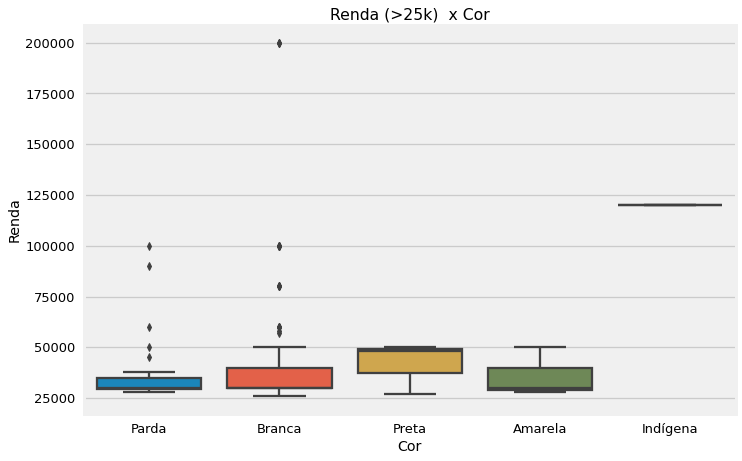

In [43]:
# Renda (>5000) by cor
sns.boxplot(x = df['Cor'], y = df['Renda'][df['Renda'] > 25000], data = df[df['Renda'] > 25000])
plt.title('Renda (>25k)  x Cor')

###Renda x Sexo

Text(0.5, 1.0, 'Renda (>25k) x Sexo')

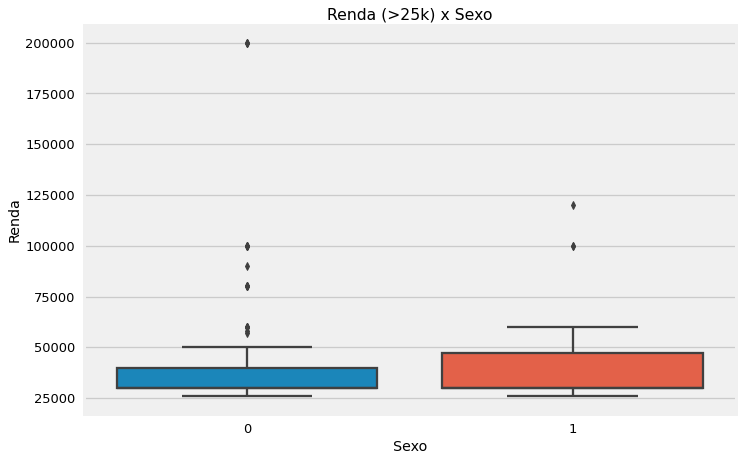

In [44]:
sns.boxplot(x = df['Sexo'], y = df['Renda'][df['Renda'] > 25000], data = df[df['Renda'] > 25000])
plt.title('Renda (>25k) x Sexo')

Text(0.5, 1.0, 'Renda (<10k) x Sexo')

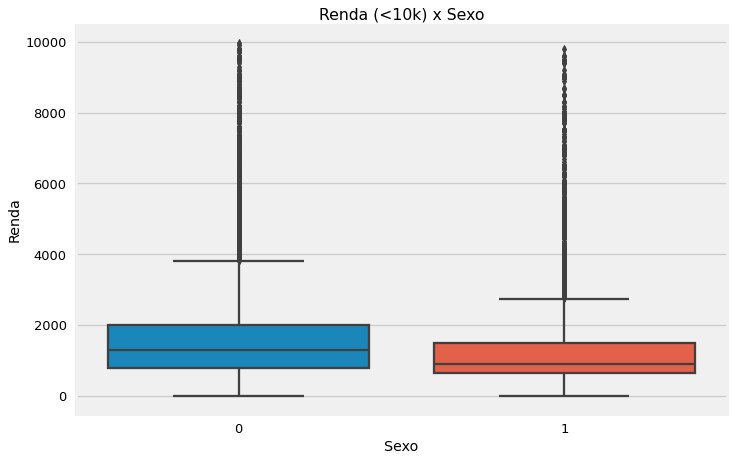

In [45]:
sns.boxplot(x = df['Sexo'], y = df['Renda'][df['Renda'] < 10000], data = df[df['Renda'] < 10000])
plt.title('Renda (<10k) x Sexo')

Text(0.5, 1.0, 'Renda (<4k) x Sexo')

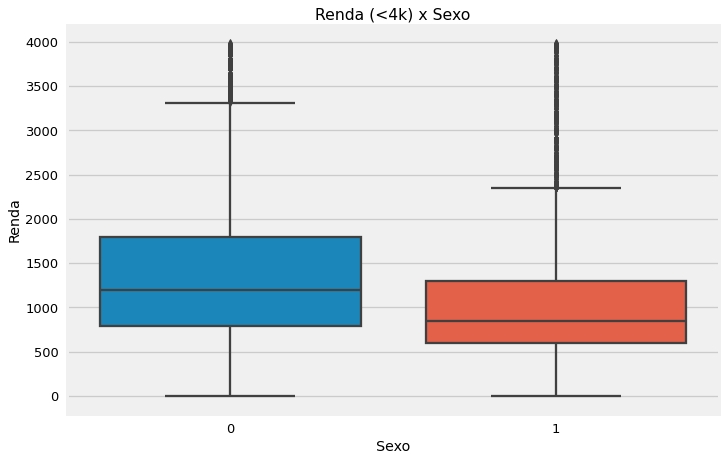

In [46]:
sns.boxplot(x = df['Sexo'], y = df['Renda'][df['Renda'] < 4000], data = df[df['Renda'] < 4000])
plt.title('Renda (<4k) x Sexo')

###Renda x Idade

Text(0.5, 1.0, 'Renda x Idade x Cor')

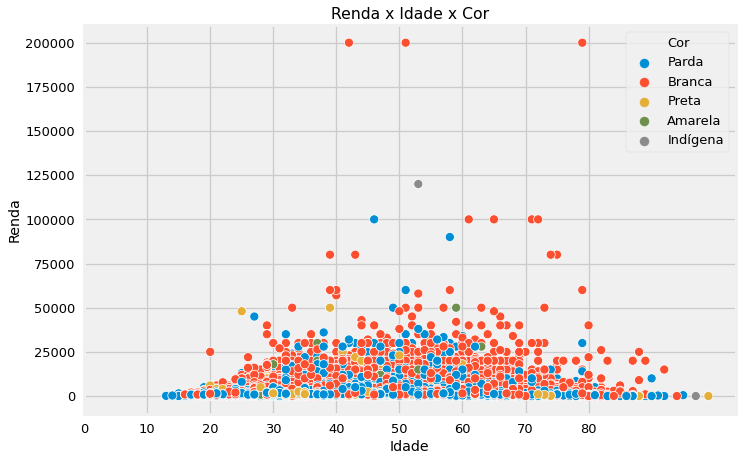

In [47]:
sns.scatterplot(df['Idade'], df['Renda'], data = df, hue = df['Cor'])
plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80], labels = [0, 10, 20, 30, 40, 50, 60, 70, 80])
plt.title("Renda x Idade x Cor")

###Renda x Anos de Estudo

In [48]:
less_than_five_years = df[df["Anos de Estudo"] <= 5]
five_nine_years = df[(df["Anos de Estudo"] > 5) &  (df["Anos de Estudo"] < 10)]
nine_fourteen_years = df[(df["Anos de Estudo"] >= 10) & (df["Anos de Estudo"] < 15)]
more_than_fifteen_years = df[df["Anos de Estudo"] >= 15]

In [49]:
print("Average Salary (Renda) for 0-5 years of study :", round(less_than_five_years['Renda'].mean(), 2))
print("Average Salary (Renda) for 6-9 years of study :", round(five_nine_years['Renda'].mean(), 2))
print("Average Salary (Renda) for 10-14 years of study :", round(nine_fourteen_years['Renda'].mean(), 2))
print("Average Salary (Renda) for 15+ years of study :", round(more_than_fifteen_years['Renda'].mean(), 2))

Average Salary (Renda) for 0-5 years of study : 984.49
Average Salary (Renda) for 6-9 years of study : 1370.89
Average Salary (Renda) for 10-14 years of study : 1943.51
Average Salary (Renda) for 15+ years of study : 5242.44


In [50]:
# plot averages
year_avgs = np.array([
    round(less_than_five_years['Renda'].mean(), 2),
    round(five_nine_years['Renda'].mean(), 2),
    round(nine_fourteen_years['Renda'].mean(), 2),
    round(more_than_fifteen_years['Renda'].mean(), 2)
    ])

categories = np.array(['<5', '5-9', '10-14', '15+'])

Text(0.5, 1.0, 'Renda x Anos de Estudo')

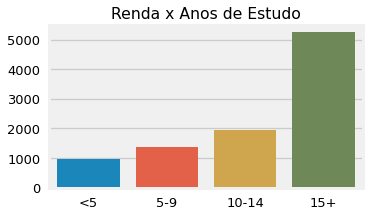

In [51]:
plt.figure(figsize=(5,3))
sns.barplot(x=categories, y=year_avgs)
plt.title("Renda x Anos de Estudo")

###Renda x UF

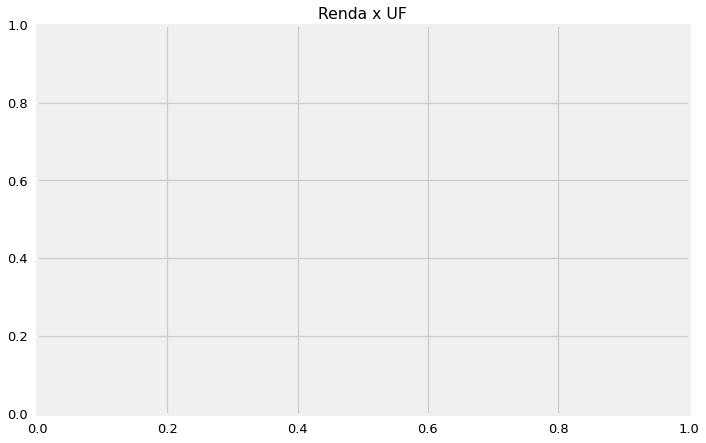

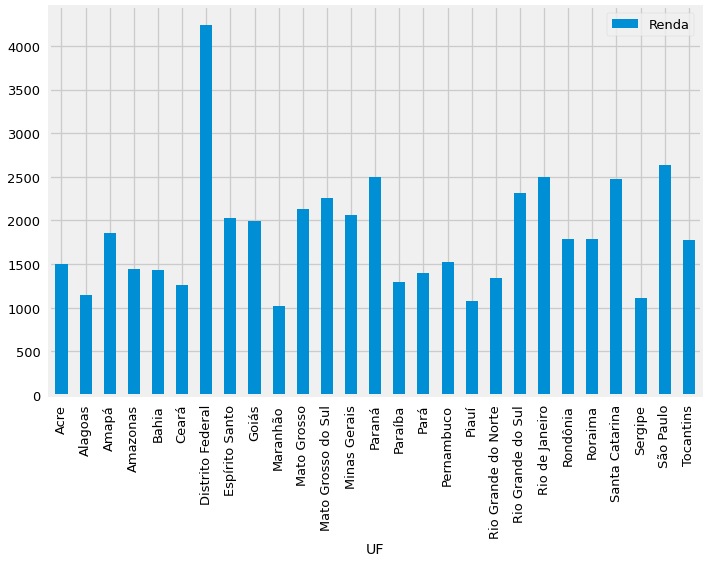

In [52]:
plt.title("Renda x UF")
df.groupby('UF').mean()[['Renda']].plot(kind='bar')

##Altura

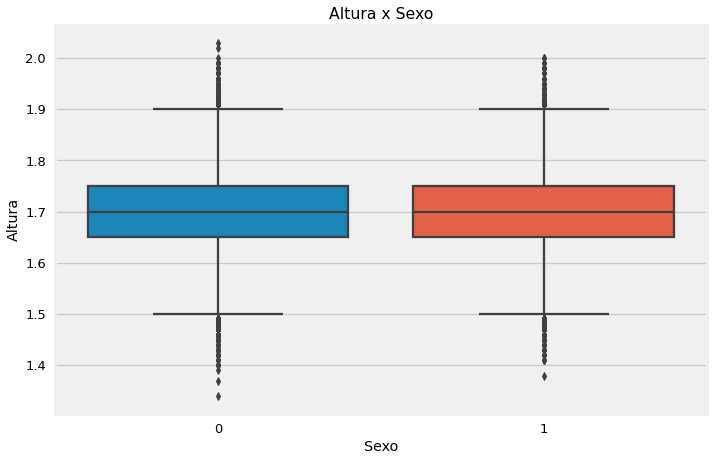

In [53]:
# Altura by Sexo
plt.title("Altura x Sexo")
sns.boxplot(x = df['Sexo'], y = df['Altura'])

In [54]:
print("Average height for men :", round(df[df['Sexo'] == 0].Altura.mean(), 3))
print("Average height for women :", round(df[df['Sexo'] == 1].Altura.mean(), 3))

Average height for men : 1.699
Average height for women : 1.7


#Attributes Relations

Now let's check some correlations on the data.

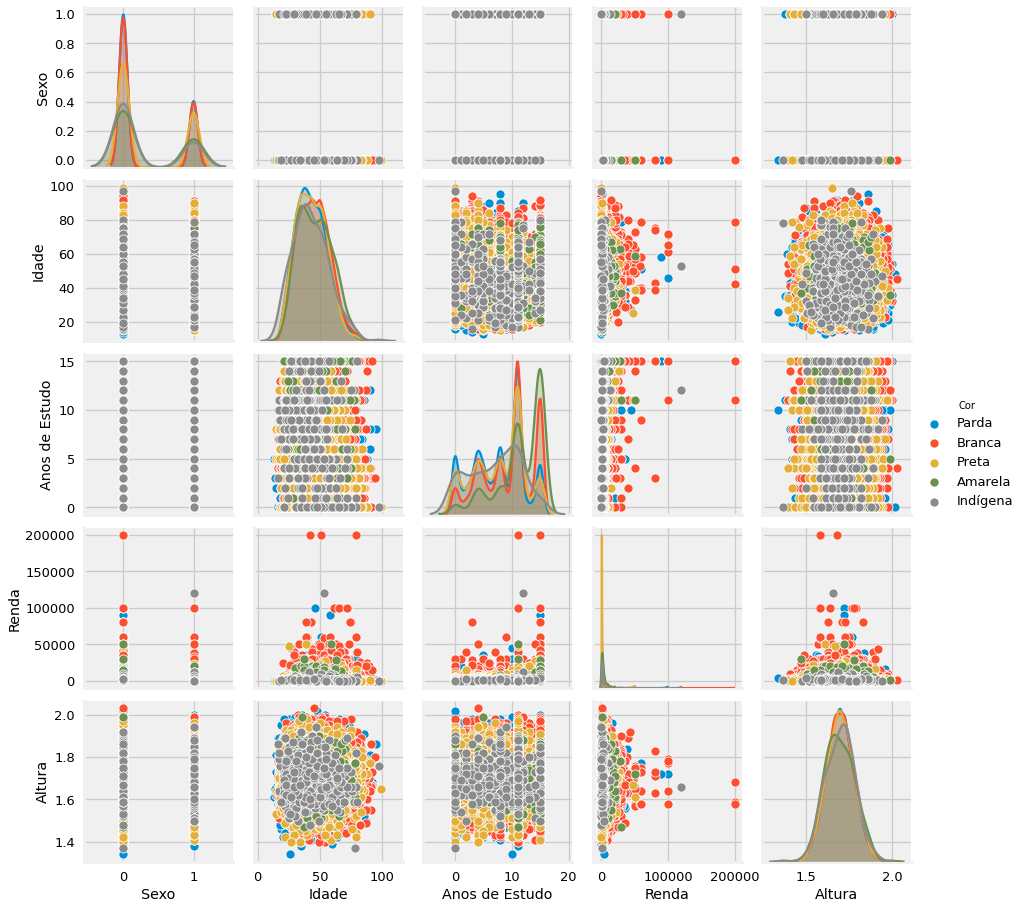

In [55]:
sns.pairplot(df, hue = 'Cor')

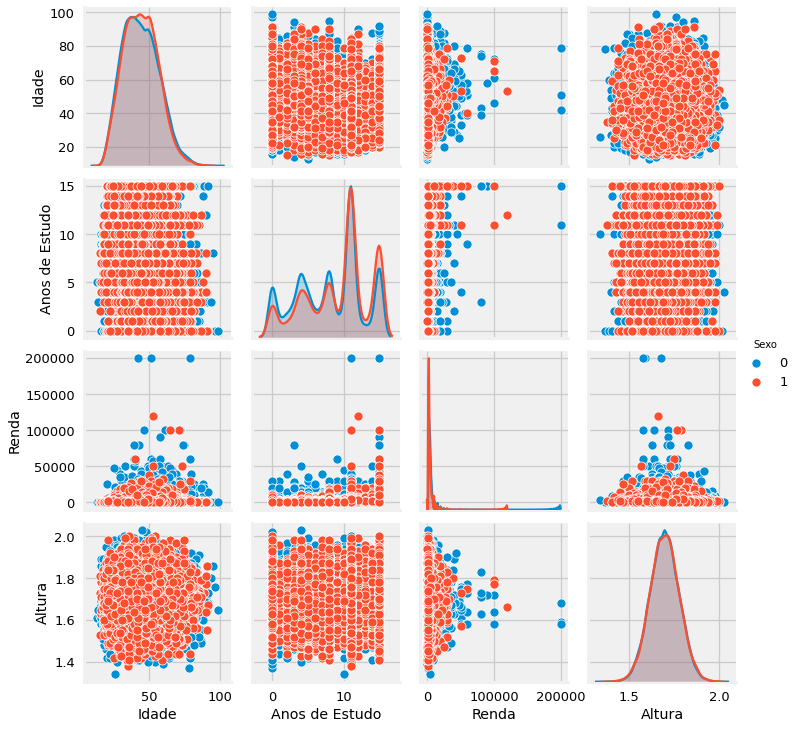

In [56]:
sns.pairplot(df, hue = 'Sexo')

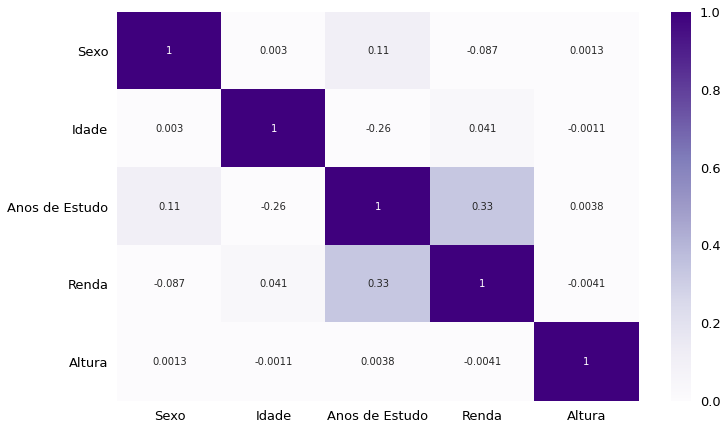

In [57]:
# heatmap for correlations
corr = df.corr()
sns.heatmap(corr, annot = True, vmin = 0, vmax = 1, cmap = 'Purples')

#Dealing with Outliers

One issue we might want to address is the imbalance on the target column (Renda). Those outliers (salaries above ~15k) will certainly have a bad influence on the model while fitting, so we can test it out by creating a new dataset (df_model) that has fewer outliers. Since the outliers are quite few in numbers, droping these observations should have no impact on the model's learning. 

The metric that we will be using (RMSE: Root Mean Squared Error) to evaluate the models is sensitive to outliers, so this is also a good reason to remove some data that is too far from the normal.

You can test your own values and get new results if you open this notebook with Google Colab.

In [58]:
# Creating new df, with fewer outliers
df_model = df[df['Renda'] <= 15000]
df.shape, df_model.shape

((76840, 7), (76219, 7))

#One Hot Encoding

As stated in the "Data Manipulation" section, we wil now perform One Hot Encoding to prepare the data for the model.

In [59]:
df_model = pd.get_dummies(df_model, drop_first = True)
df_model.shape

(76219, 35)

In [60]:
df_model.head()

,Sexo,Idade,Anos de Estudo,Renda,Altura,UF_Alagoas,UF_Amapá,UF_Amazonas,UF_Bahia,UF_Ceará,UF_Distrito Federal,UF_Espírito Santo,UF_Goiás,UF_Maranhão,UF_Mato Grosso,UF_Mato Grosso do Sul,UF_Minas Gerais,UF_Paraná,UF_Paraíba,UF_Pará,UF_Pernambuco,UF_Piauí,UF_Rio Grande do Norte,UF_Rio Grande do Sul,UF_Rio de Janeiro,UF_Rondônia,UF_Roraima,UF_Santa Catarina,UF_Sergipe,UF_São Paulo,UF_Tocantins,Cor_Branca,Cor_Indígena,Cor_Parda,Cor_Preta
0,0,23,11,800,1.60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,1,23,11,1150,1.74,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,1,35,14,880,1.76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,0,46,5,3500,1.78,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,1,47,8,150,1.69,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


#Defining features and target

In [61]:
df_model.columns

Index(['Sexo', 'Idade', 'Anos de Estudo', 'Renda', 'Altura', 'UF_Alagoas',
       'UF_Amapá', 'UF_Amazonas', 'UF_Bahia', 'UF_Ceará',
       'UF_Distrito Federal', 'UF_Espírito Santo', 'UF_Goiás', 'UF_Maranhão',
       'UF_Mato Grosso', 'UF_Mato Grosso do Sul', 'UF_Minas Gerais',
       'UF_Paraná', 'UF_Paraíba', 'UF_Pará', 'UF_Pernambuco', 'UF_Piauí',
       'UF_Rio Grande do Norte', 'UF_Rio Grande do Sul', 'UF_Rio de Janeiro',
       'UF_Rondônia', 'UF_Roraima', 'UF_Santa Catarina', 'UF_Sergipe',
       'UF_São Paulo', 'UF_Tocantins', 'Cor_Branca', 'Cor_Indígena',
       'Cor_Parda', 'Cor_Preta'],
      dtype='object')

In [62]:
features = df_model.drop('Renda', axis = 1)
features.shape

(76219, 34)

In [63]:
features.head()

,Sexo,Idade,Anos de Estudo,Altura,UF_Alagoas,UF_Amapá,UF_Amazonas,UF_Bahia,UF_Ceará,UF_Distrito Federal,UF_Espírito Santo,UF_Goiás,UF_Maranhão,UF_Mato Grosso,UF_Mato Grosso do Sul,UF_Minas Gerais,UF_Paraná,UF_Paraíba,UF_Pará,UF_Pernambuco,UF_Piauí,UF_Rio Grande do Norte,UF_Rio Grande do Sul,UF_Rio de Janeiro,UF_Rondônia,UF_Roraima,UF_Santa Catarina,UF_Sergipe,UF_São Paulo,UF_Tocantins,Cor_Branca,Cor_Indígena,Cor_Parda,Cor_Preta
0,0,23,11,1.60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,1,23,11,1.74,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,1,35,14,1.76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,0,46,5,1.78,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,1,47,8,1.69,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [64]:
target = df_model['Renda']
target.shape

(76219,)

In [65]:
target.head()

0     800
1    1150
2     880
3    3500
4     150
Name: Renda, dtype: int64

#Scaling

In [66]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [67]:
# scaling dataset
scaler.fit(features)
features_scaled = scaler.transform(features)

In [68]:
features_scaled

array([[0.        , 0.11627907, 0.73333333, ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.11627907, 0.73333333, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.25581395, 0.93333333, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.        , 0.22093023, 0.73333333, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.51162791, 0.2       , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.29069767, 0.2       , ..., 0.        , 1.        ,
        0.        ]])

#Regression Preliminary Modeling

In [69]:
from sklearn.model_selection import cross_val_score
cv = 10
scoring = 'neg_mean_squared_error'
random_state = 0

We will evaluate our models using RMSE (Root Mean Squared Error). In this metric, the lower the scoring is the better the model is.

In [70]:
all_models = []
all_scores = []

##Linear Regression

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
model = LinearRegression()
scores = cross_val_score(model, features_scaled, target, cv = cv,
                         scoring = scoring, n_jobs = -1)
np.sqrt(-scores.mean())

100987208259324.2

Lol. Linear Regression, y u so bad? xD
I won't even plot this.

Obviously, the relations on this dataset cannot be modeled with a linear algorithm.

##Lasso Regression

In [73]:
from sklearn.linear_model import Lasso

In [74]:
model = Lasso(random_state = random_state)
scores = cross_val_score(model, features_scaled, target, cv = cv,
                         scoring = scoring, n_jobs = -1)
res = round(np.sqrt(-scores.mean()), 2)

In [75]:
all_models.append('Lasso')
all_scores.append(res)

In [76]:
all_models, all_scores

(['Lasso'], [1739.11])

##Ridge Regression

In [77]:
from sklearn.linear_model import Ridge

In [78]:
model = Ridge(random_state = random_state)
scores = cross_val_score(model, features_scaled, target, cv = cv,
                         scoring = scoring, n_jobs = -1)
res = round(np.sqrt(-scores.mean()), 2)

In [79]:
all_models.append('Ridge')
all_scores.append(res)

In [80]:
all_models, all_scores

(['Lasso', 'Ridge'], [1739.11, 1738.84])

##Nearest Neighbors

In [81]:
from sklearn.neighbors import KNeighborsRegressor

In [82]:
model = KNeighborsRegressor()
scores = cross_val_score(model, features_scaled, target, cv = cv,
                         scoring = scoring, n_jobs = -1)
res = round(np.sqrt(-scores.mean()), 2)

In [83]:
all_models.append('KNN')
all_scores.append(res)

In [84]:
all_models, all_scores

(['Lasso', 'Ridge', 'KNN'], [1739.11, 1738.84, 1779.39])

##Decision Tree Regressor

In [85]:
from sklearn.tree import DecisionTreeRegressor

In [86]:
model = DecisionTreeRegressor(random_state = random_state)
scores = cross_val_score(model, features_scaled, target, cv = cv,
                         scoring = scoring, n_jobs = -1)
res = round(np.sqrt(-scores.mean()), 2)

In [87]:
all_models.append('Decision Tree')
all_scores.append(res)

In [88]:
all_models, all_scores

(['Lasso', 'Ridge', 'KNN', 'Decision Tree'],
 [1739.11, 1738.84, 1779.39, 2190.58])

##XGB Regressor

Obs.: I also experimented with other tree-based models, like RandomForestRegressor, but the models usually take too long to run (several minutes) and output worse results.

In [89]:
from xgboost import XGBRegressor

In [90]:
# this takes a minute to run
model = XGBRegressor(random_state = random_state)
scores = cross_val_score(model, features_scaled, target, cv = cv,
                         scoring = scoring, n_jobs = -1)
res = round(np.sqrt(-scores.mean()), 2)

In [91]:
all_models.append('XGB')
all_scores.append(res)

In [92]:
all_models, all_scores

(['Lasso', 'Ridge', 'KNN', 'Decision Tree', 'XGB'],
 [1739.11, 1738.84, 1779.39, 2190.58, 1633.0])

##Neural Networks

In [93]:
from sklearn.neural_network import MLPRegressor

In [94]:
# this takes a few minutes to run
model = MLPRegressor(random_state = random_state)
scores = cross_val_score(model, features_scaled, target, cv = cv,
                         scoring = scoring, n_jobs = -1)
res = round(np.sqrt(-scores.mean()), 2)

In [95]:
all_models.append('MLP')
all_scores.append(res)

In [96]:
all_models, all_scores

(['Lasso', 'Ridge', 'KNN', 'Decision Tree', 'XGB', 'MLP'],
 [1739.11, 1738.84, 1779.39, 2190.58, 1633.0, 1726.76])

##Preliminary Modeling Results

In [97]:
names = list(all_models)
values = list(all_scores)

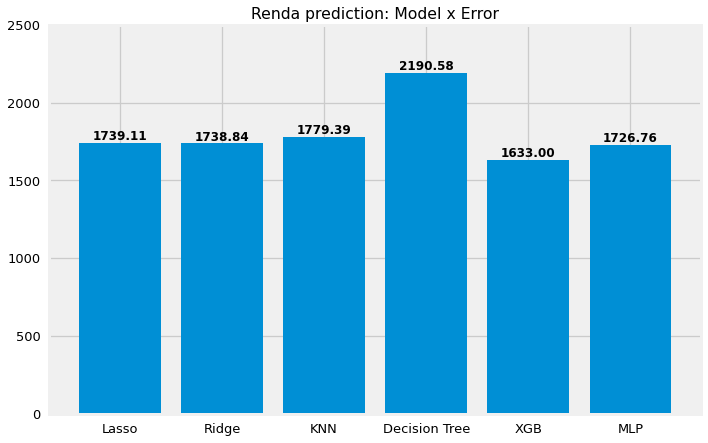

In [98]:
# plot results
bar1 = plt.bar(np.arange(len(values)), values)
plt.xticks(range(len(names)), names)
plt.title('Renda prediction: Model x Error')
plt.ylim(0,2500)
for rect in bar1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.2f' % float(height), ha='center', va='bottom', fontsize = 12, fontweight = 'bold')

We can see that the best model we tested is the XGB Regressor, so that's what we are going to use from now on.

#Split dataset

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target,
                                                      test_size = 0.2, random_state = random_state)

In [101]:
X_train.shape, X_test.shape

((60975, 34), (15244, 34))

In [102]:
y_train.shape, y_test.shape

((60975,), (15244,))

#Training

In [103]:
from sklearn.metrics import mean_squared_error

In [104]:
# Define model
model = XGBRegressor(objective='reg:squarederror', random_state = random_state)

# Fit (train) model
model.fit(X_train, y_train,
          eval_set=[(X_train, y_train), (X_test, y_test)],
          eval_metric='rmse',
          verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [105]:
# Evaluate model
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("MSE: %.2f" % rmse)

MSE: 1575.71


We can see that the model has improved and reduced its error after training on the data.

In [106]:
all_models.append('XGB trained')
all_scores.append(rmse)

In [107]:
all_models, all_scores

(['Lasso', 'Ridge', 'KNN', 'Decision Tree', 'XGB', 'MLP', 'XGB trained'],
 [1739.11, 1738.84, 1779.39, 2190.58, 1633.0, 1726.76, 1575.7091020384587])

#Final Results

##Models comparison

In [108]:
names = list(all_models)
values = list(all_scores)

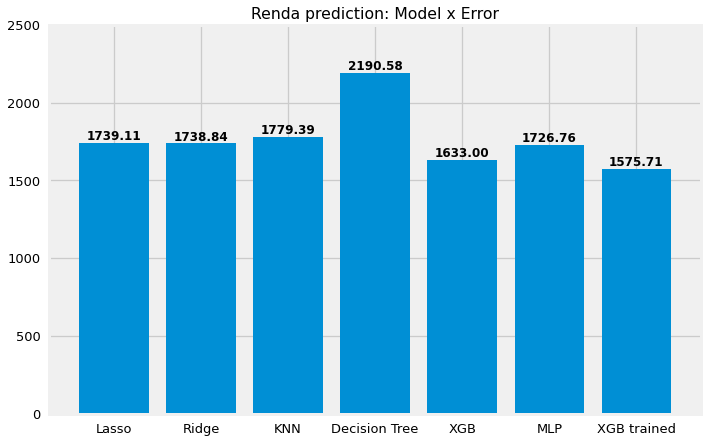

In [109]:
# plot results
bar1 = plt.bar(np.arange(len(values)), values)
plt.xticks(range(len(names)), names)
plt.title('Renda prediction: Model x Error')
plt.ylim(0,2500)
for rect in bar1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.2f' % float(height), ha='center', va='bottom', fontsize = 12, fontweight = 'bold')

##Feature Importances

The plot below reveals the importances of each feature (column) on the dataset. These importances were captured by the model while fitting the data and they show which features have the most impact on the prediction of the value of Renda.

Text(0.5, 1.0, 'Feature Importances')

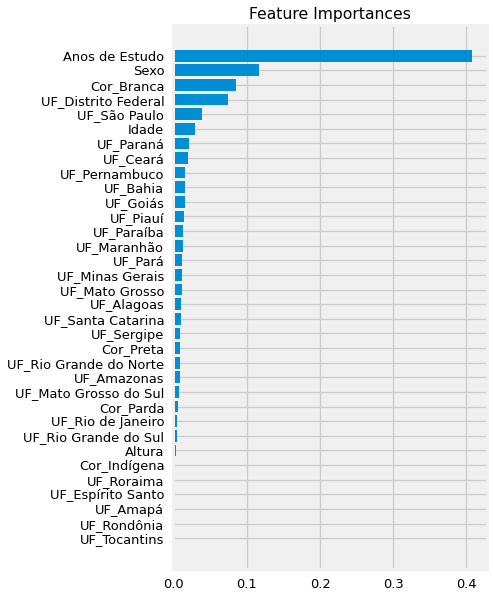

In [110]:
features_importances = model.feature_importances_
argsort = np.argsort(features_importances)
features_importances_sorted = features_importances[argsort]

feature_names = features.columns
features_sorted = feature_names[argsort]

# plot feature importances
plt.figure(figsize = (5,10))
plt.barh(features_sorted, features_importances_sorted)
plt.title("Feature Importances")

##Renda: Predicted x Real

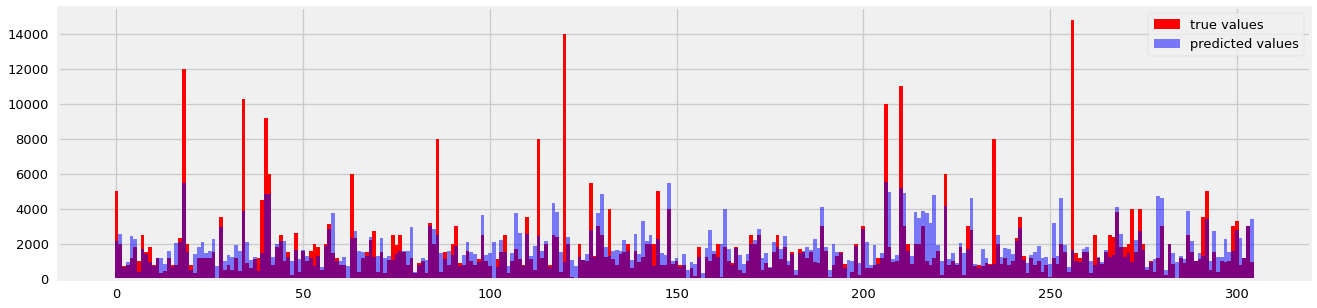

In [111]:
print_every = 50
fig = plt.figure(figsize=(20,5))
plt.bar(list(range(len(y_test[::print_every]))), y_test.values[::print_every],
        alpha = 1, color = 'red', width = 1, label = 'true values')
plt.bar(list(range(len(y_pred[::print_every]))), y_pred[::print_every],
        alpha = 0.5, color = 'blue', width = 1, label = 'predicted values')
plt.legend()

##Make predictions

In [112]:
# Making predictions of Renda for the first 5 observations of the test set (X_test)
model.predict(X_test)[0:5]

array([2174.3137, 1123.2986, 1351.1097,  815.7586, 1112.346 ],
      dtype=float32)

In [113]:
# Make any prediction you want!
# Define your features array: Set the values below for each column

my_pred = np.array([[

# Sexo
1,
# Idade
25,
# Anos de Estudo
8,
# Altura
1.65,
# UF_Alagoas
0,
# UF_Amapá
0,
# UF_Amazonas
0,
# UF_Bahia
0,
# UF_Ceará
0,
# UF_Distrito Federal
0,
# UF_Espírito Santo
0,
# UF_Goiás
0,
# UF_Maranhão
0,
# UF_Mato Grosso
0,
# UF_Mato Grosso do Sul
0,
# UF_Minas Gerais
0,
# UF_Paraná
0,
# UF_Paraíba
0,
# UF_Pará
0,
# UF_Pernambuco
0,
# UF_Piauí
0,
# UF_Rio Grande do Norte
0,
# UF_Rio Grande do Sul
0,
# UF_Rio de Janeiro
1,
# UF_Rondônia
0,
# UF_Roraima
0,
# UF_Santa Catarina
0,
# UF_Sergipe
0,
# UF_São Paulo
0,
# UF_Tocantins
0,
# Cor_Branca 
0,
# Cor_Indígena
0,
# Cor_Parda 
1,
# Cor_Preta
0
]])

In [114]:
res = model.predict(my_pred)
print("Renda predicted for information in my_pred array:", round(res[0], 2), "reais.")

Renda predicted for information in my_pred array: 3954.96 reais.


If you are not happy with ypur predictions, go check again the "Feature Importances" section and change your input ;)

#Conclusions

This article explored the PNAD 2015 dataset and was able to provide some insights on it. It showed that, with the features and information contained on this dataset, it's possible to predict the value of a person's monthly salary (Renda) with a RMSE of ~1600.